# The Ising model on Trees/General graphs


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from utils.gen_utils import create_lattice
from IsingModel import IsingModel
from main_tree import simulate_ising_model


## Regular lattice

In [27]:
### setting the parameters ###
N = 40
J = 1.0
n_equilib_steps = 10_000
n_mcmc_steps = 5_000
n_samples = None
n_sample_interval = 10
step_algorithm = "wolff"
betas = [0.3,0.35, 0.4, 0.45,0.5]
temps = np.linspace(0.01, 5.0,100)

In [28]:
# create the structure 
nodes, neighbors = create_lattice(N)

## Thermalization process

2 Main ways to set the initial states:
- equally distributed spins -> corresponds to an $\beta = \infty$
- all spins aligned in the same direction -> corresponds to $\beta = 0$


In [29]:

nodes, neighbors = create_lattice(N)

init_types = {
    "random": np.random.choice([-1, 1], size=nodes.size),
    #"aligned": np.ones(nodes.size, dtype=np.int8)
}
results = {}
for temp in temps:
    for init_type, init_spins in init_types.items():
        if init_type == "random":
            init_spins = np.random.choice([-1, 1], size=nodes.size)
        elif init_type == "aligned":
            init_spins = np.ones(nodes.size, dtype=np.int8)
        
        model = IsingModel(
            nodes=init_spins,
            neighbors=neighbors,
            temp = temp,
            J=J,
            n_equilib_steps=n_equilib_steps,
            n_mcmc_steps=n_mcmc_steps,
            n_samples=n_samples,
            n_sample_interval=n_sample_interval,
            step_algorithm=step_algorithm
        )

        model = simulate_ising_model(model)
        results[(temp, init_type)] = (model.energy_equil, model.magn_equil)
        


Time taken:  30.511164903640747
Time taken:  30.144971132278442
Time taken:  30.3039128780365
Time taken:  30.232388019561768
Time taken:  30.274903059005737
Time taken:  30.266613960266113
Time taken:  30.316763162612915
Time taken:  30.244678258895874
Time taken:  30.385350942611694
Time taken:  30.320642948150635
Time taken:  30.399508953094482
Time taken:  30.616981029510498
Time taken:  30.549483060836792
Time taken:  30.827253103256226
Time taken:  32.762574195861816
Time taken:  32.06373596191406
Time taken:  30.973230123519897
Time taken:  156.13846468925476
Time taken:  115.1556670665741
Time taken:  107.71560883522034
Time taken:  94.90647506713867
Time taken:  110.24166679382324
Time taken:  84.62675619125366
Time taken:  149.62305903434753
Time taken:  128.01704502105713
Time taken:  121.83324694633484
Time taken:  126.30746507644653
Time taken:  103.66705203056335
Time taken:  44.65165400505066
Time taken:  43.49395394325256
Time taken:  44.25648212432861
Time taken:  43.3

In [ ]:
# plot the neighbors using neighbors array
plt.figure(figsize=(20,20))
G = nx.Graph()
G.add_nodes_from(np.arange(nodes.size))
for i in range(nodes.size):
    # add position to the node 
    G.nodes[i]['pos'] = (i % N, i // N)
    for j in neighbors[i]:
        if j != -1:
            G.add_edge(i, j)

# plot the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, with_labels=True)
if False: plt.show()

In [ ]:
temps
results

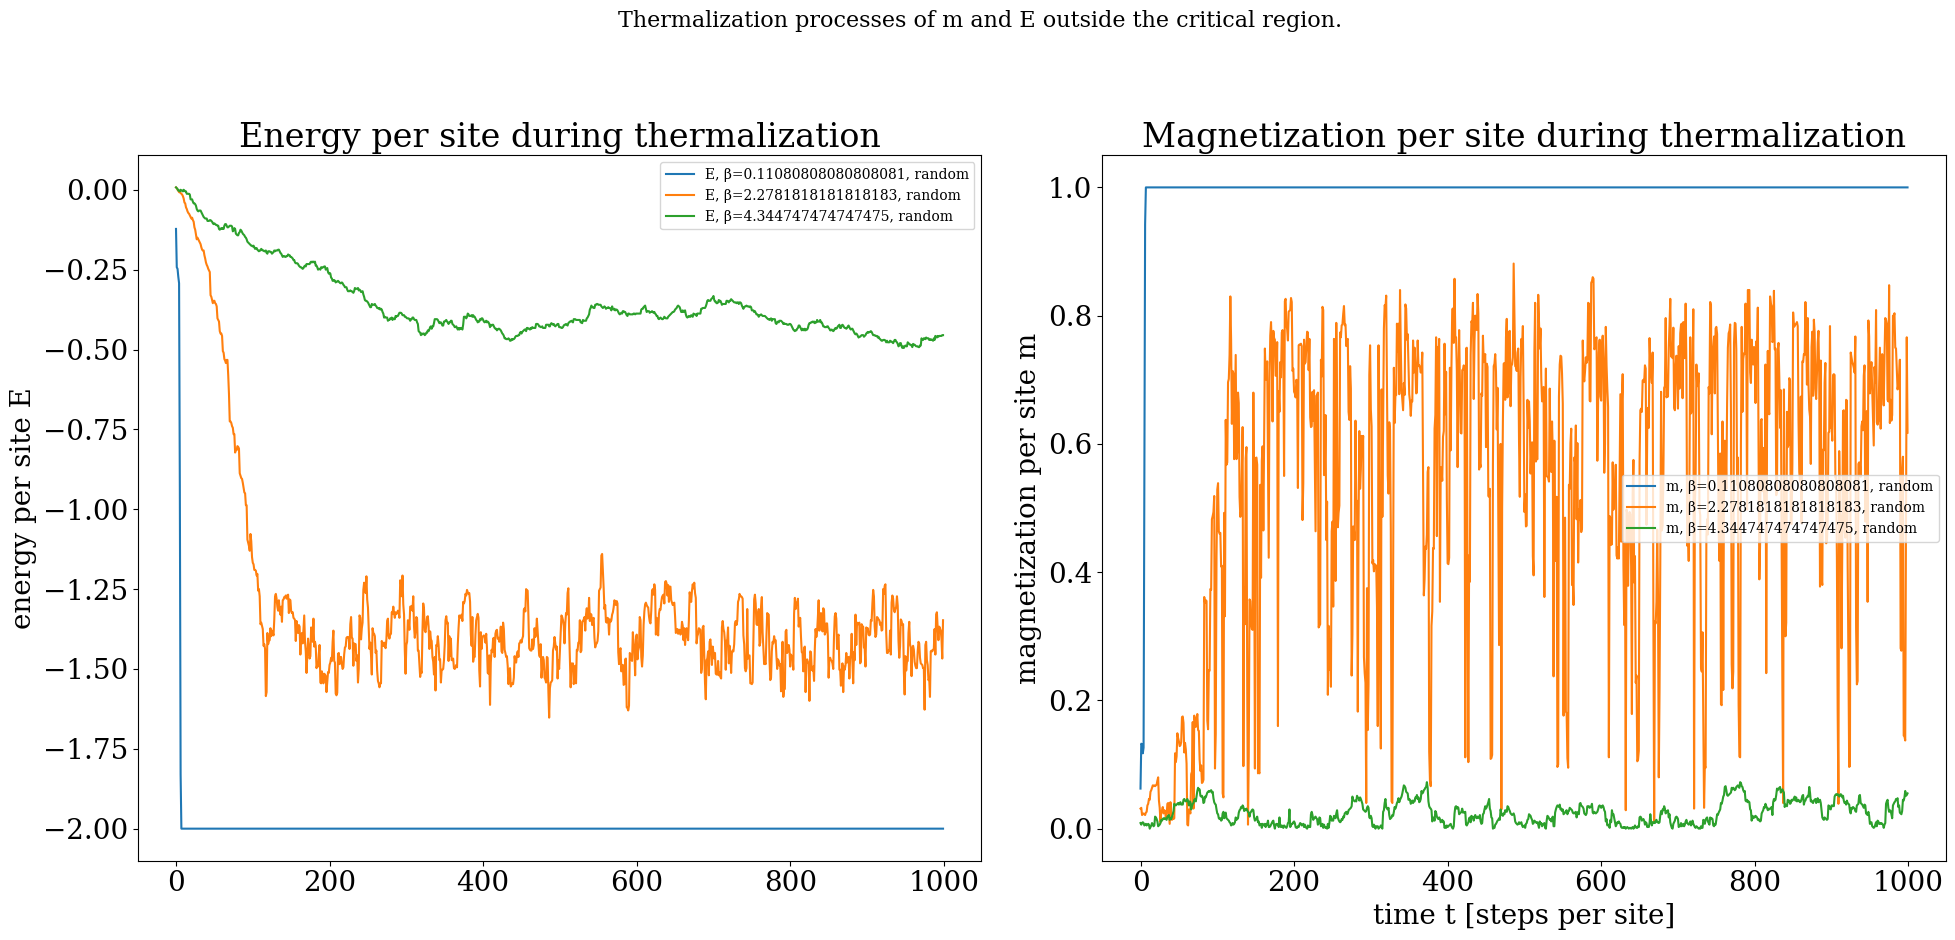

In [34]:
### plotting the results

max_timestep = 1000

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
betas = [0.11080808080808081,2.2781818181818183,4.344747474747475]

# Define colors for betas and linestyles for init_types
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
beta_colors = colors[:len(betas)]
init_linestyles = ['-', '--']  # One linestyle per init_type

# First subplot: Energy per site
for idx, beta in enumerate(betas):
    for init_idx, (init_name, _) in enumerate(init_types.items()):
        energy, _ = results[(beta, init_name)]
        axes[0].plot(energy[:max_timestep], 
                     color=beta_colors[idx], 
                     linestyle=init_linestyles[init_idx], 
                     label=f"E, β={beta}, {init_name}")

axes[0].set_ylabel("energy per site E")
axes[0].legend(fontsize=10)
axes[0].set_title("Energy per site during thermalization")

# Second subplot: Magnetization per site
for idx, beta in enumerate(betas):
    for init_idx, (init_name, _) in enumerate(init_types.items()):
        _, magn = results[(beta, init_name)]
        axes[1].plot(magn[:max_timestep], 
                     color=beta_colors[idx], 
                     linestyle=init_linestyles[init_idx], 
                     label=f"m, β={beta}, {init_name}")

axes[1].set_xlabel("time t [steps per site]")
axes[1].set_ylabel("magnetization per site m")
axes[1].legend(fontsize=10)
axes[1].set_title("Magnetization per site during thermalization")

plt.suptitle("Thermalization processes of m and E outside the critical region.", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Autocorrelation

In [20]:
def autocorr(x):
    x = np.array(x)
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size // 2:]
    return result / result[0]

plt.figure(figsize=(10,5))
colors = ['blue', 'green', 'red', 'purple', 'orange']

#betas = [0.3,0.35, 0.4, 0.45,0.5]
init_style = "random"
# energy autocorrelation
for i, beta in enumerate(betas):
    corr = autocorr(results[(beta, init_style)][0])
    corr = corr[:500]
    plt.plot(corr, color=colors[i], label=f'T={beta}')

plt.legend()
plt.show()

# magnetization autocorrelation
for i, beta in enumerate(betas):
    corr = autocorr(results[(beta, init_style)][1])
    corr = corr[:500]
    plt.plot(corr, color=colors[i], label=f'T={beta}')

plt.legend()
plt.show()

KeyError: (0.3, 'random')

<Figure size 1000x500 with 0 Axes>

In [3]:
nodes, neighbors = create_lattice(N)

temps = np.linspace(0.01, 5.0, 200)
n_sample_interval = 1_000 # look at autocorrelation
n_equilib_steps = 1_000 # look at thermalization
n_mcmc_steps = 10_000 # gives us 100 samples
n_samples = None 

magn, energy, specific_heat, susceptibility = [], [], [], []

for T in temps:
    nodes = np.random.choice([-1, 1], size=nodes.size)
    model = IsingModel(
        nodes=nodes,
        neighbors=neighbors,
        temp=T,
        J=1.0,
        n_equilib_steps=n_equilib_steps,
        n_mcmc_steps=n_mcmc_steps,
        n_samples=n_samples,
        n_sample_interval=n_sample_interval,
        step_algorithm=step_algorithm
    )
    model = simulate_ising_model(model)
    magn.append(model.avg_magn)
    energy.append(model.avg_energy)
    specific_heat.append(model.specific_heat)
    susceptibility.append(model.susceptibility)


NameError: name 'N' is not defined

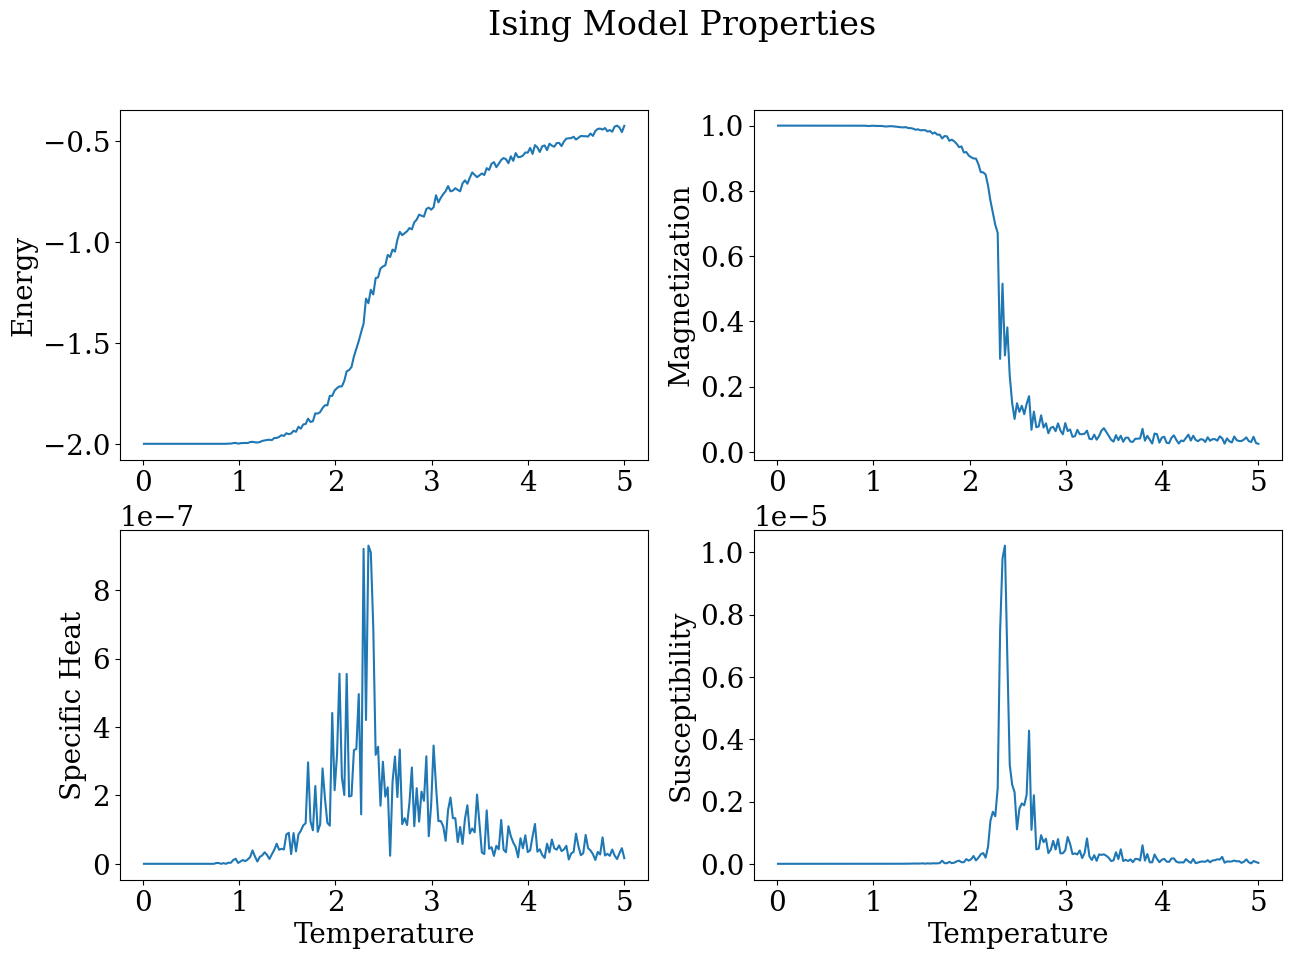

In [12]:
from utils.gen_utils import plot_magn_energy_spech_susc

plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)

# Binary Tree

In [1]:
def create_binary_tree(depth:int):
    # Create a binary tree using NetworkX
    G = nx.balanced_tree(2, depth-1)  # 2 children per node, depth-1 levels
    
    # Initialize nodes array (all nodes start with value 1)
    nodes = np.ones(len(G))
    
    # Initialize neighbors array
    neighbors = np.zeros((len(G), 3))  # Changed to 3 to store [parent, child1, child2]
    neighbors.fill(-1)  # Default to no neighbors
    
    # For each node, get its neighbors (both children and parent)
    for node in sorted(G.nodes()):
        # Get all neighbors (both children and parent)
        all_neighbors = sorted(list(G.neighbors(node)))
        
        # For root node (node 0), it only has children
        if node == 0:
            if len(all_neighbors) == 2:
                neighbors[node] = np.array([-1, all_neighbors[0], all_neighbors[1]])
        # For other nodes, they have one parent and potentially two children
        else:
            # Find the parent (it's the neighbor with smaller index)
            parent = min(all_neighbors)
            # Find the children (they're the neighbors with larger indices)
            children = [n for n in all_neighbors if n > node]
            
            # Store parent and children
            if len(children) == 2:
                neighbors[node] = np.array([parent, children[0], children[1]])
            elif len(children) == 1:
                neighbors[node] = np.array([parent, children[0], -1])
            else:
                neighbors[node] = np.array([parent, -1, -1])
    
    # turn neighbors into list of ints
    neighbors = neighbors.astype(np.int32)
    
    # Debug print
    # print("Tree structure:")
    # for node in sorted(G.nodes()):
    #     print(f"Node {node}: [parent, child1, child2] = {neighbors[node]}")
    
    return nodes, neighbors

In [12]:
d = 7
J = 1.0
n_equilib_steps = 1_000
n_mcmc_steps = 5_000
n_samples = None
n_sample_interval = 10
step_algorithm = "wolff"
betas = [0.3,0.35, 0.4, 0.45,0.5]

## Thermolization process
random and aligned init conditions

In [13]:
nodes, neighbors = create_binary_tree(depth = d)

In [15]:
init_types = {
    "random": np.random.choice([-1, 1], size=nodes.size),
    "aligned": np.ones(nodes.size, dtype=np.int8)
}
results = {}
results_mcmc = {}
for beta in betas:
    for init_type, init_spins in init_types.items():
        if init_type == "random":
            init_spins = np.random.choice([-1, 1], size=nodes.size)
        elif init_type == "aligned":
            init_spins = np.ones(nodes.size, dtype=np.int8)
        
        model = IsingModel(
            nodes=init_spins,
            neighbors=neighbors,
            temp = 1/beta,
            J=J,
            n_equilib_steps=n_equilib_steps,
            n_mcmc_steps=n_mcmc_steps,
            n_samples=n_samples,
            n_sample_interval=n_sample_interval,
            step_algorithm=step_algorithm
        )

        model = simulate_ising_model(model)
        results[(beta, init_type)] = (model.energy_equil, model.magn_equil)
        results_mcmc[(beta, init_type)] = (model.energy_all, model.magn_all)

Time taken:  0.08356881141662598
Time taken:  0.08192086219787598
Time taken:  0.08265089988708496
Time taken:  0.08344578742980957
Time taken:  0.08414077758789062
Time taken:  0.08420920372009277
Time taken:  0.08328580856323242
Time taken:  0.08287382125854492
Time taken:  0.0843350887298584
Time taken:  0.08561277389526367


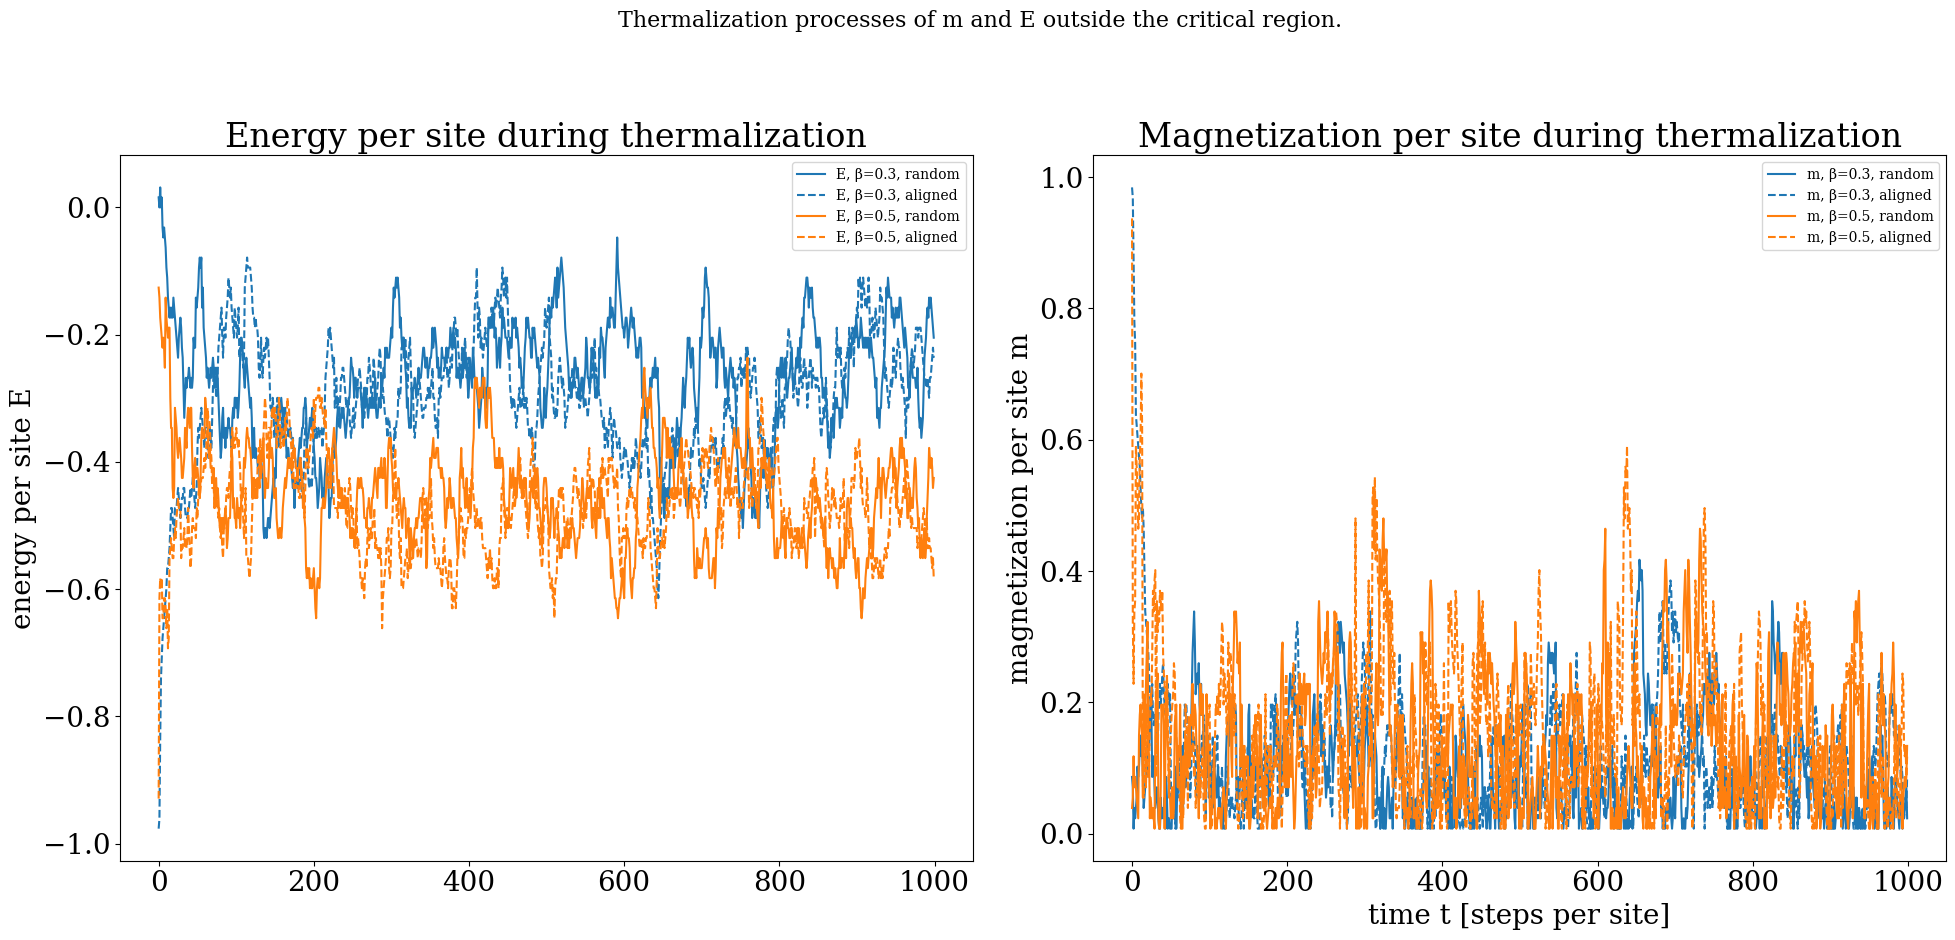

In [16]:
### Plotting the resutls ###

max_timestep = 2_000

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
betas = [0.3, 0.4, 0.45]
betas = [0.3,0.5]

# Define colors for betas and linestyles for init_types
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
beta_colors = colors[:len(betas)]
init_linestyles = ['-', '--']  # One linestyle per init_type

# First subplot: Energy per site
for idx, beta in enumerate(betas):
    for init_idx, (init_name, _) in enumerate(init_types.items()):
        energy, _ = results[(beta, init_name)]
        axes[0].plot(energy[:max_timestep], 
                     color=beta_colors[idx], 
                     linestyle=init_linestyles[init_idx], 
                     label=f"E, β={beta}, {init_name}")

axes[0].set_ylabel("energy per site E")
axes[0].legend(fontsize=10)
axes[0].set_title("Energy per site during thermalization")

# Second subplot: Magnetization per site
for idx, beta in enumerate(betas):
    for init_idx, (init_name, _) in enumerate(init_types.items()):
        _, magn = results[(beta, init_name)]
        axes[1].plot(magn[:max_timestep], 
                     color=beta_colors[idx], 
                     linestyle=init_linestyles[init_idx], 
                     label=f"m, β={beta}, {init_name}")

axes[1].set_xlabel("time t [steps per site]")
axes[1].set_ylabel("magnetization per site m")
axes[1].legend(fontsize=10)
axes[1].set_title("Magnetization per site during thermalization")

plt.suptitle("Thermalization processes of m and E outside the critical region.", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

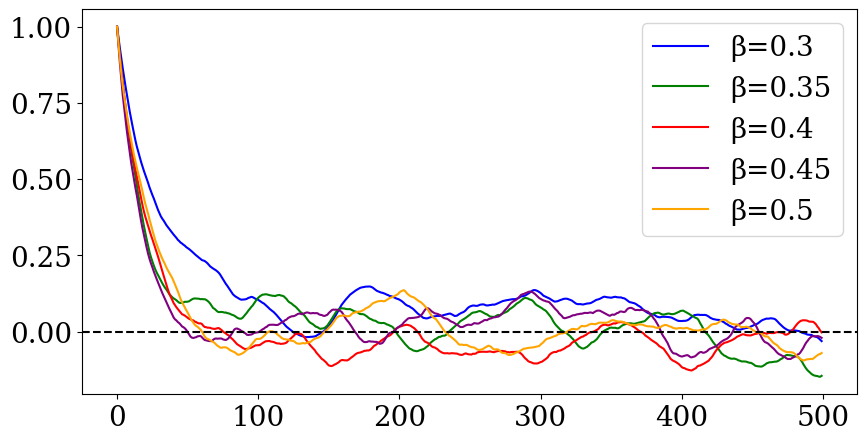

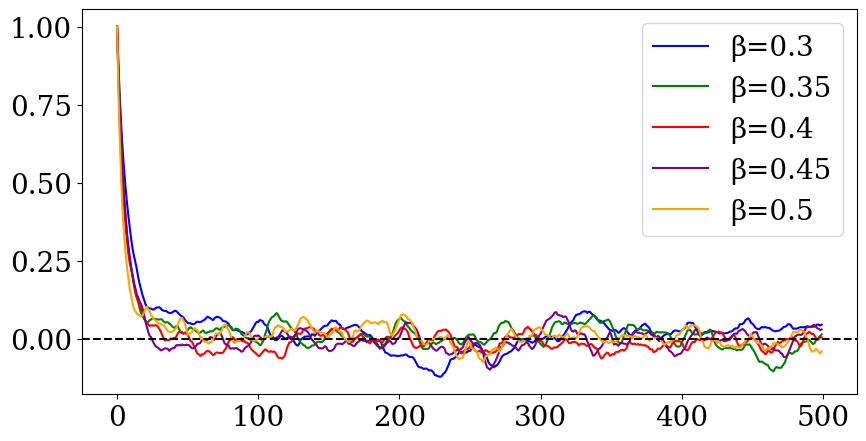

In [23]:
from utils.gen_utils import autocorr
plt.figure(figsize=(10,5))
colors = ['blue', 'green', 'red', 'purple', 'orange']

betas = [0.3,0.35, 0.4, 0.45,0.5]
init_style = "random"
# energy autocorrelation
for i, beta in enumerate(betas):
    corr = autocorr(results_mcmc[(beta, init_style)][0])
    corr = corr[:500]
    plt.plot(corr, color=colors[i], label=f'β={beta}')
# plot the horizontal line
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
# magnetization autocorrelation
for i, beta in enumerate(betas):
    corr = autocorr(results_mcmc[(beta, init_style)][1])
    corr = corr[:500]
    plt.plot(corr, color=colors[i], label=f'β={beta}')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()

In [18]:
from main_tree import simulate_ising_full
#nodes, neighbors = create_binary_tree(d)

# lets do this on a larger tree
d = 10
nodes, neighbors = create_binary_tree(d)
print(nodes.shape)

temps = np.arange(0.01, 3.0, 0.01)
n_sample_interval = 150 # look at autocorrelation
n_equilib_steps = 1_000 # look at thermalization
n_mcmc_steps = 150_000 # gives us 100 samples
n_samples = None 

results = simulate_ising_full(nodes, neighbors, 1.0, n_equilib_steps, n_mcmc_steps, n_samples, n_sample_interval, temps)

magn, energy, specific_heat, susceptibility = [], [], [], []
for t in temps:
    magn.append(results[t].avg_magn)
    energy.append(results[t].avg_energy)
    specific_heat.append(results[t].specific_heat)
    susceptibility.append(results[t].susceptibility)

# for T in temps:
#     nodes = np.random.choice([-1, 1], size=nodes.size)
#     model = IsingModel(
#         nodes=nodes,
#         neighbors=neighbors,
#         temp=T,
#         J=1.0,
#         n_equilib_steps=n_equilib_steps,
#         n_mcmc_steps=n_mcmc_steps,
#         n_samples=n_samples,
#         n_sample_interval=n_sample_interval,
#         step_algorithm=step_algorithm
#     )
#     model = simulate_ising_model(model)
#     magn.append(model.avg_magn)
#     energy.append(model.avg_energy)
#     specific_heat.append(model.specific_heat)
#     susceptibility.append(model.susceptibility)

(127,)
Using 8 processes


100%|██████████| 299/299 [00:00<00:00, 26313.41it/s]
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie

Temperature: 0.04 - Time taken: 6.26131796836853
Temperature: 0.08 - Time taken: 6.241766691207886
Temperature: 0.05 - Time taken: 6.450332880020142
Temperature: 0.01 - Time taken: 6.467787027359009
Temperature: 0.060000000000000005 - Time taken: 6.4904351234436035
Temperature: 0.02 - Time taken: 6.574151992797852
Temperature: 0.06999999999999999 - Time taken: 6.666417837142944
Temperature: 0.03 - Time taken: 7.429435968399048
Temperature: 0.09999999999999999 - Time taken: 5.72874116897583
Temperature: 0.09 - Time taken: 5.814149856567383
Temperature: 0.12 - Time taken: 5.742619752883911
Temperature: 0.11 - Time taken: 5.806694030761719
Temperature: 0.13 - Time taken: 5.806448936462402
Temperature: 0.14 - Time taken: 5.778803110122681
Temperature: 0.15000000000000002 - Time taken: 5.871309995651245
Temperature: 0.16 - Time taken: 6.886599063873291
Temperature: 0.18000000000000002 - Time taken: 5.900973796844482
Temperature: 0.17 - Time taken: 6.033616304397583
Temperature: 0.2 - Time t

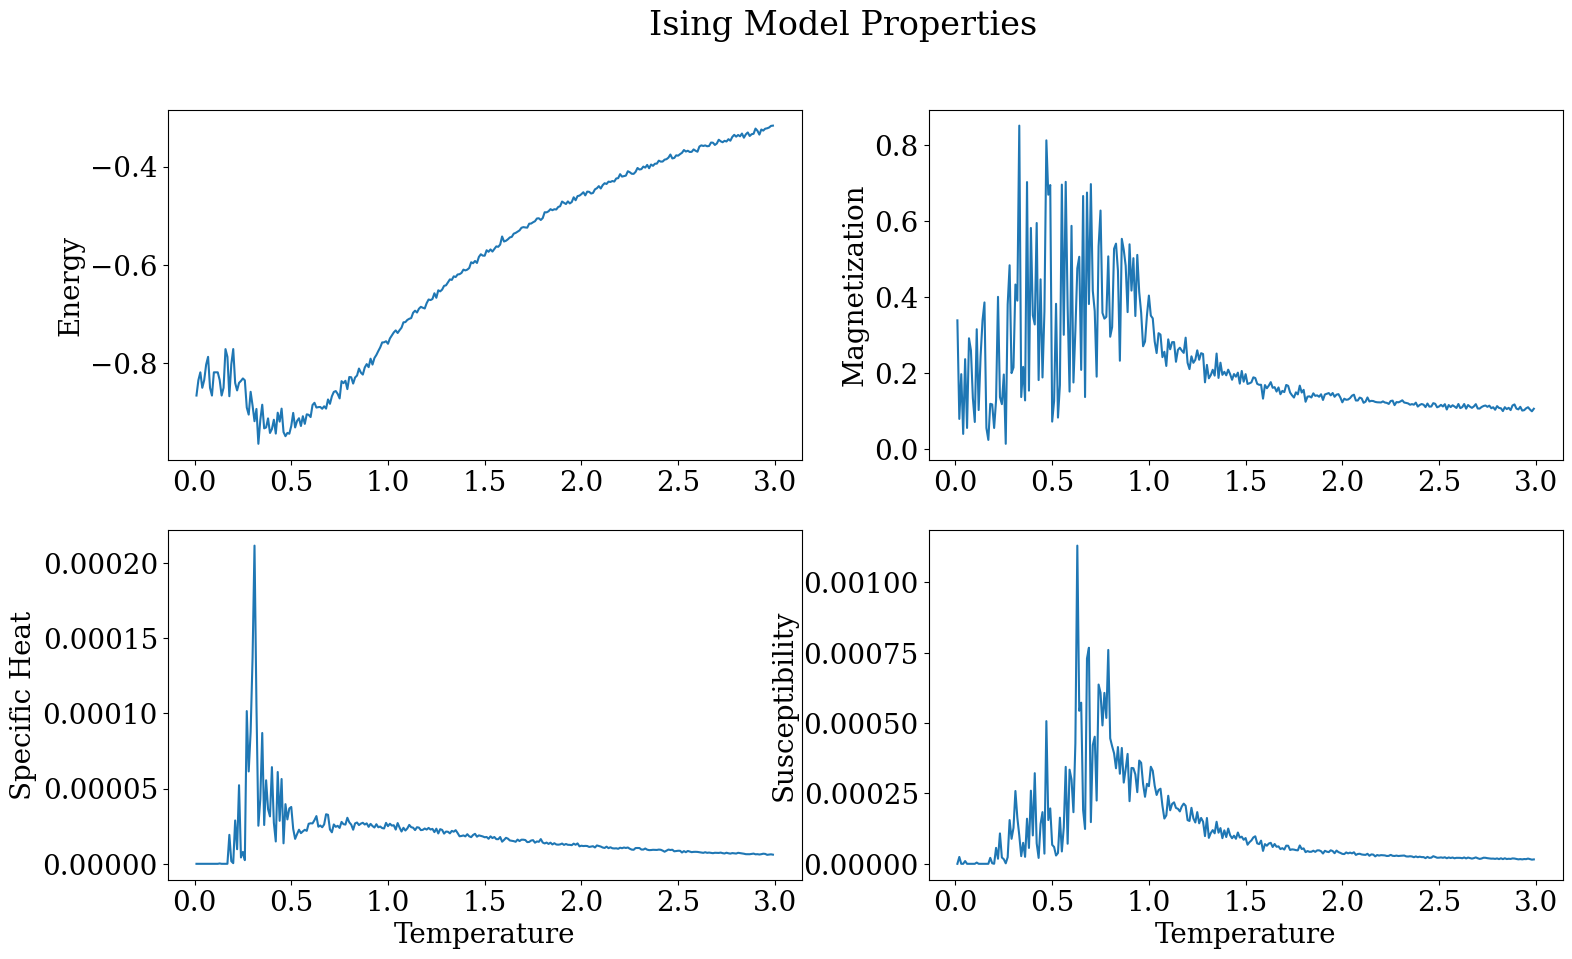

In [19]:
from utils.gen_utils import plot_magn_energy_spech_susc
plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)

## Branching model

In [31]:
from branch_sim import MamSimulation


In [32]:
## Set the parameters
tmax = 100

In [ ]:
## Simulate the structure
